Install Prophet which is a forecasting tool by meta for fast and accurate results.
pip install prophet

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

/Users/jahnavireddy/Desktop/walmart_sales_forecasting_project/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [3]:
#load the cleaned data
df=pd.read_csv('../data/cleaned_walmart_sales.csv',parse_dates=['Date'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Week,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Hot_Week
0,1,1,2010-02-05,24924.50,False,2010,2,5,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False
1,1,1,2010-02-12,46039.49,True,2010,2,6,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,False
2,1,1,2010-02-19,41595.55,False,2010,2,7,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,False
3,1,1,2010-02-26,19403.54,False,2010,2,8,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,False
4,1,1,2010-03-05,21827.90,False,2010,3,9,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,False


In [5]:
# Filter data for a specific store and department and rename columns for Prophet
# Prophet requires two columns: ds(date or datetime) and y(numeric column to be forecasted)
store_id=1
dept_id=1

df_subset=df[(df['Store']==store_id) & (df['Dept']==dept_id)]
df_subset=df_subset[['Date','Weekly_Sales']].rename(columns={'Date':'ds','Weekly_Sales':'y'})


In [6]:
# Initialize and train the Prophet model on the selected store-department sales data
model=Prophet()
model.fit(df_subset)

08:52:45 - cmdstanpy - INFO - Chain [1] start processing
08:52:45 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
# Predict the future sales for the next 6 weeks
# freq is set to daily prediction of sales
future=model.make_future_dataframe(periods=6*7,freq='D')
forecast=model.predict(future)

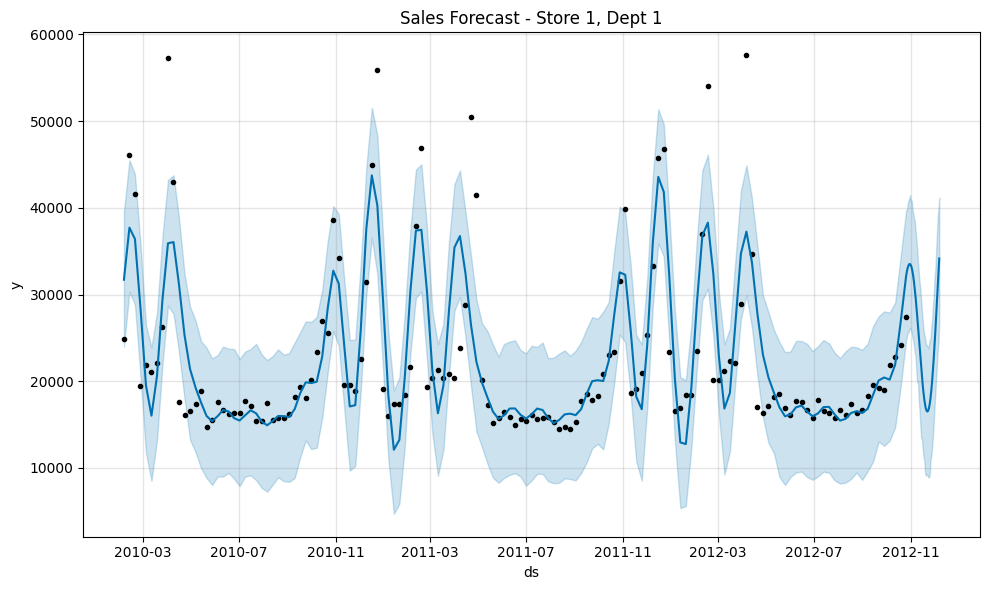

In [8]:
#Visualize the forecast
fig=model.plot(forecast)
plt.title(f"Sales Forecast - Store {store_id}, Dept {dept_id}")
plt.tight_layout()
plt.savefig(f'../reports/figures/forecast_store{store_id}_dept{dept_id}.png')
plt.show()

In [ ]:
# View the forecast data
# Most Recent 10 forecasted dates and their predicted sales 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
175,2012-11-28,20050.091412,12451.471168,27107.398114
176,2012-11-29,21262.822498,13726.305713,28603.429192
177,2012-11-30,22617.522565,15238.656374,29872.172137
178,2012-12-01,24094.167413,16998.583401,31793.218381
179,2012-12-02,25670.431077,18560.496555,32817.135293
180,2012-12-03,27322.103885,20252.828548,34748.099650
181,2012-12-04,29023.544767,21718.420057,36918.424167
182,2012-12-05,30748.157858,23483.615770,38738.919158
183,2012-12-06,32468.883050,24397.844234,39941.392070
184,2012-12-07,34158.689980,26796.493727,41183.888100


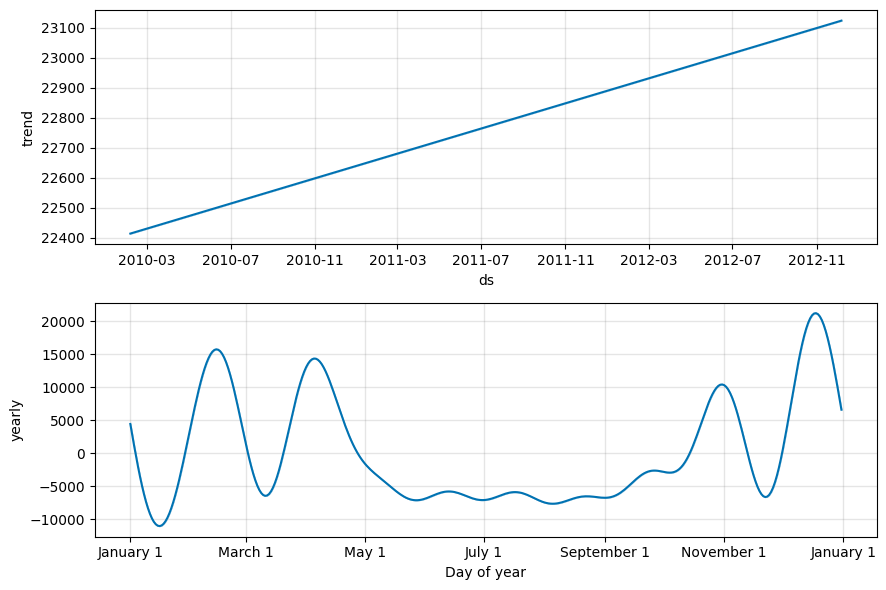

In [17]:
#Plot the trend and seasonality components of the forecast
fig2 = model.plot_components(forecast)
plt.savefig(f'../reports/figures/forecast_components_store{store_id}_dept{dept_id}.png')
plt.show()

In [18]:
#Saving the output
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(f'../data/forecast_store{store_id}_dept{dept_id}.csv', index=False)